# Q6

Import some prerequisites:

In [100]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Run this cell for plotting.

In [101]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

Here is for your helper functions(optional).

Implement this function to get the input image and return the skeleton of the input image.

In [102]:
import numpy as np

def dilate(img, kernel):
    '''
    Dilates image with given kernel.

    Parameters:
        img (np.ndarray): The image to dilate.
        kernel (np.ndarray): The kernel to dilate image with.

    Returns:
        np.ndarray: The dilated image.
    '''
    
    img_dilated = np.zeros(img.shape)
    kernel_height, kernel_width = kernel.shape
    kernel_half_height = kernel_height // 2
    kernel_half_width = kernel_width // 2

    padded_img = np.pad(img, ((kernel_half_height, kernel_half_height), (kernel_half_width, kernel_half_width)), mode='constant')

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img_patch = padded_img[i:i+kernel_height, j:j+kernel_width]
            max_val = np.max(img_patch * kernel)
            img_dilated[i, j] = max_val

    return img_dilated



Test implementation

In [103]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_dilate = dilate(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_dilate, 'dilate of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_dilate= dilate(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_dilate, 'dilate of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_dilate = dilate(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_dilate, 'dilate of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_dilate = dilate(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_dilate, 'dilate of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-a-dilate')

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
import numpy as np

def erode(img, kernel):
    '''
    Erodes image with given kernel.

    Parameters:
        img (np.ndarray): The image to erode.
        kernel (np.ndarray): The kernel to erode image with.

    Returns:
        np.ndarray: The eroded image.
    '''
    img_eroded = np.zeros(img.shape, dtype=np.uint8)  # Initialize the eroded image as an array of zeros with the same shape as the input image
    
    kernel_height, kernel_width = kernel.shape
    kernel_half_height = kernel_height // 2
    kernel_half_width = kernel_width // 2

    img_padded = np.pad(img, ((kernel_half_height, kernel_half_height), (kernel_half_width, kernel_half_width)), mode='constant')  # Pad the image to handle boundary pixels
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img_patch = img_padded[i:i+kernel_height, j:j+kernel_width]  # Extract the image patch corresponding to the kernel
            min_value = np.min(img_patch[kernel > 0])  # Minimum value within the kernel region
            img_eroded[i, j] = min_value
    
    return img_eroded



Test your implementation

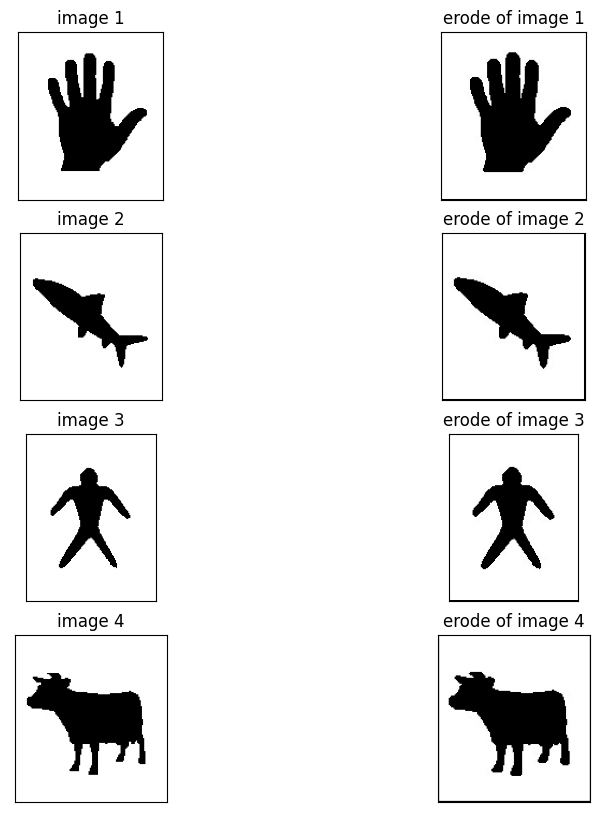

In [ ]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_erode = erode(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_erode, 'erode of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_erode= erode(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_erode, 'erode of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_erode = erode(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_erode, 'erode of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_erode = erode(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_erode, 'erode of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-a-erode')

In [ ]:
def open_morphology(img, kernel): 
    '''
    Performs opening morphology operation on the image.

    Parameters:
        img (numpy.ndarray): The image to perform opening morphology operation on.

    Returns:
        numpy.ndarray: The result image.
    '''

    eroded_img = erode(img, kernel)
    opened_img = dilate(eroded_img, kernel)
    
    return opened_img

Test your implementatino

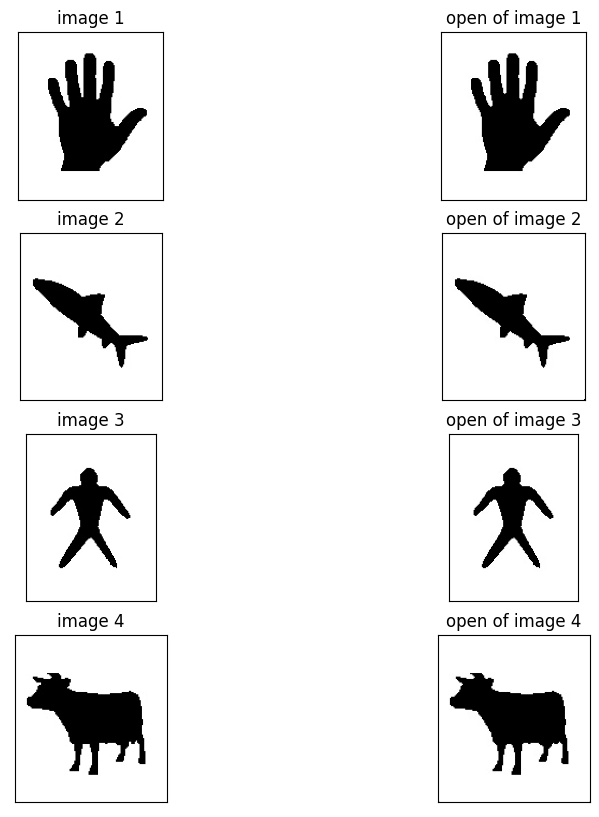

In [ ]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_open = open_morphology(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_open, 'open of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_open= open_morphology(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_open, 'open of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_open = open_morphology(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_open, 'open of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_open = open_morphology(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_open, 'open of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-a-open')

In [ ]:
def close_morphology(img, kernel): 
    '''
    Performs closing morphology operation on the image.

    Parameters:
        img (numpy.ndarray): The image to perform closing morphology operation on.

    Returns:
        numpy.ndarray: The result image.
    '''

    dilated_img = dilate(img, kernel)
    closed_img = erode(dilated_img, kernel)
    
    return closed_img

Test your implemention

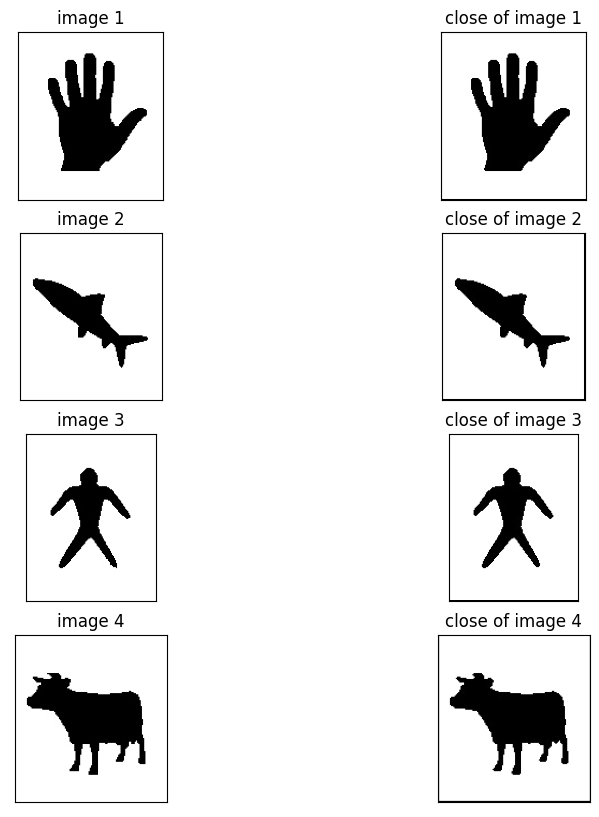

In [ ]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_close = close_morphology(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_close, 'close of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_close= close_morphology(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_close, 'close of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_close = close_morphology(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_close, 'close of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_close = close_morphology(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_close, 'close of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-a-close')

# Part 2

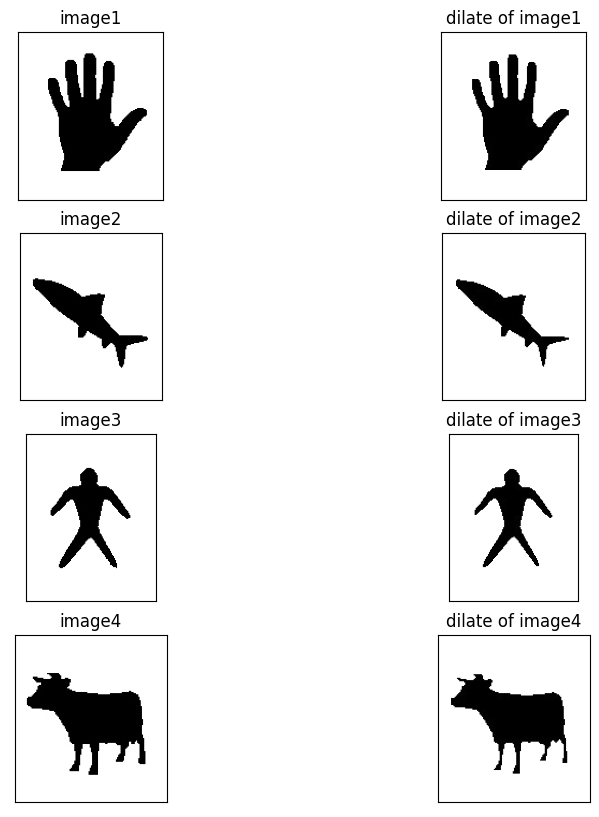

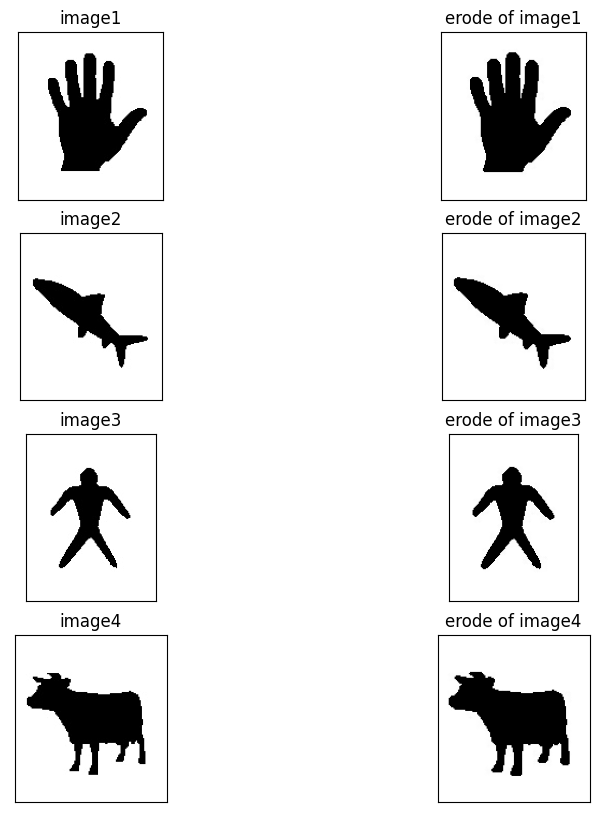

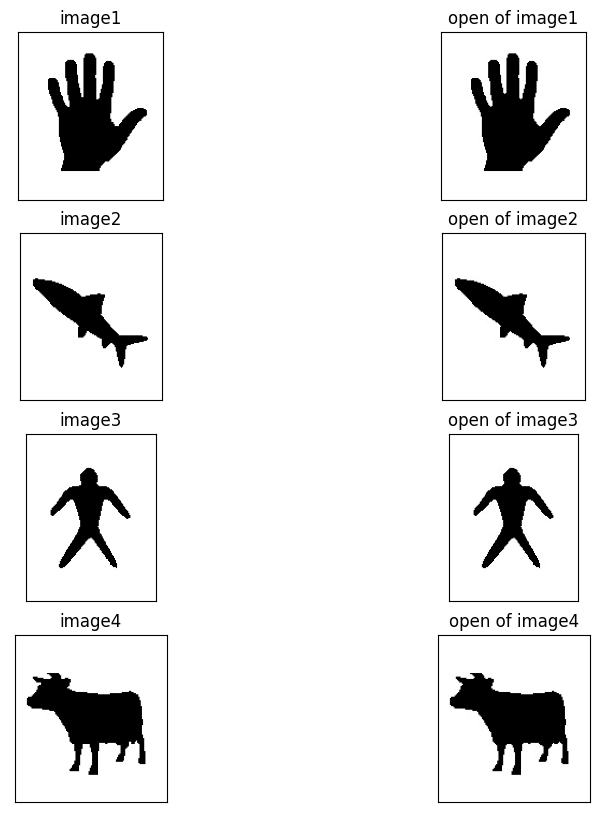

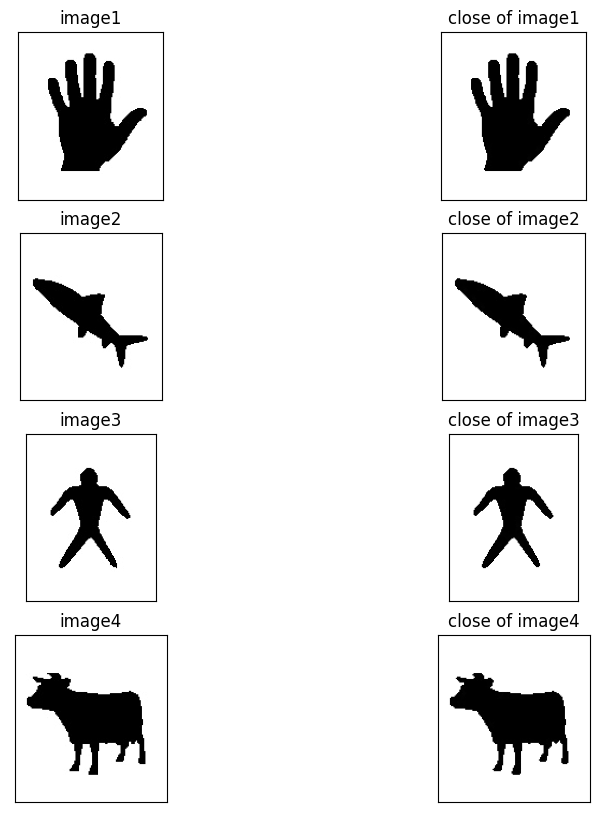

In [95]:
#Write your code here
#Like last part, you should make output of each operation separately. Name output image files like this format: Q6-b-dilate, Q6-b-erode

# Define the kernel
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8)

operations = ['dilate', 'erode', 'open', 'close']
images = {
    'image1': cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE),
    'image2': cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE),
    'image3': cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE),
    'image4': cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
}

operations_images = {}
for operation in operations:
    operations_images[operation] = {}


# Perform dilation and erosion operations on the images
for i in range(1, 5):
    image = images[f'image{i}']
    operations_images['dilate'][f'image{i}'] =cv2.dilate(image, kernel)
    operations_images['erode'][f'image{i}'] = cv2.erode(image, kernel)
    operations_images['open'][f'image{i}'] = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    operations_images['close'][f'image{i}'] = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    

# Plot the results
image_list = []
for operation in operations:
    for image in operations_images[operation]:
        image_list.append([images[image], f'{image}', 'img'])
        image_list.append([operations_images[operation][image], f'{operation} of {image}', 'img'])
    plotter(image_list, 4, 2, True, 10, 10, f'Q6-b-{operation}')
    image_list = []

# Part 3: optional
Skeleton of image

In [ ]:
def get_skeleton(image):
    """
    Finds the skeleton of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The skeleton image.  
    """
    
    res = image.copy()
    
    #Write your code here
    
    
    return res

Test your implementation (don't change this cell).

In [ ]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_skeleton = get_skeleton(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_skeleton, 'skeleton of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_skeleton= get_skeleton(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_skeleton, 'skeleton of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_skeleton = get_skeleton(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_skeleton = get_skeleton(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-c')

End!!!